## Name-Aryabrata Dev
## Project-SALES PREDICTION USING PYTHON

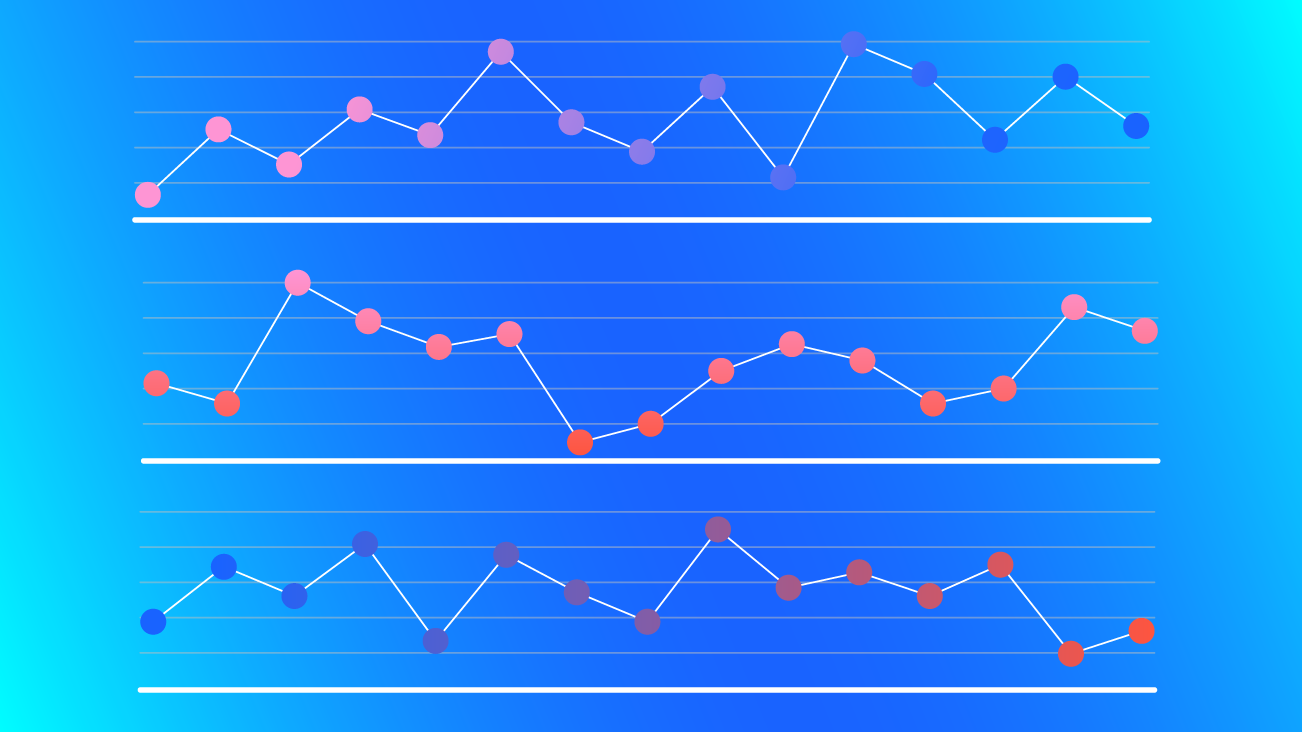

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.drop(["Unnamed: 0"],inplace=True,axis=1)


In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Data Visualization

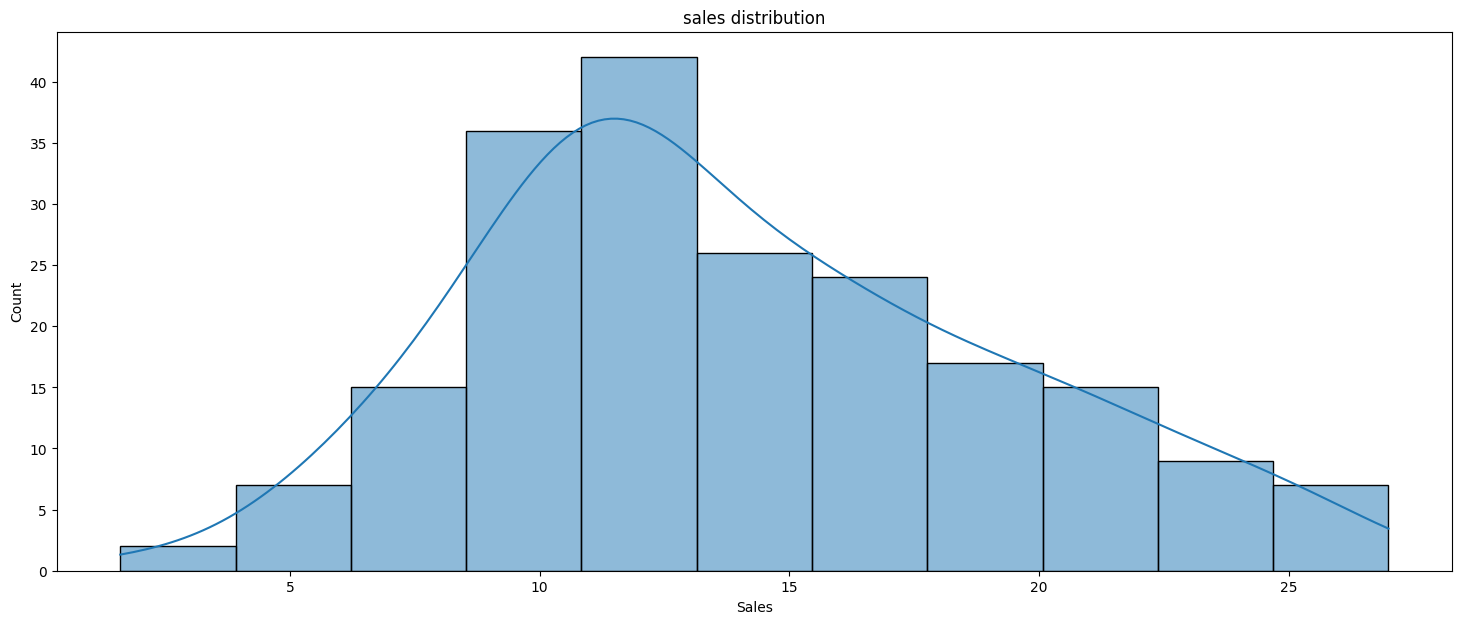

In [10]:
plt.figure(figsize=(18,7))
sns.histplot(df["Sales"],kde=True)
plt.title("sales distribution")
plt.show()

#### Most of the sales values are between 8-18

<AxesSubplot: ylabel='Frequency'>

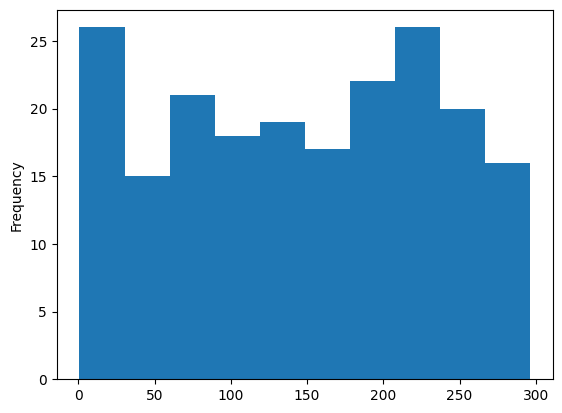

In [36]:
df["TV"].plot.hist()

<AxesSubplot: ylabel='Frequency'>

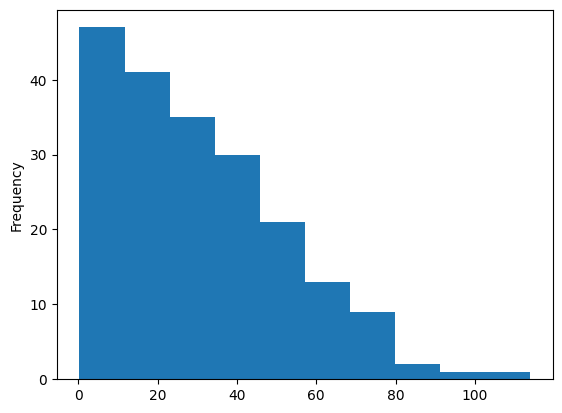

In [37]:
df["Newspaper"].plot.hist()

<AxesSubplot: ylabel='Frequency'>

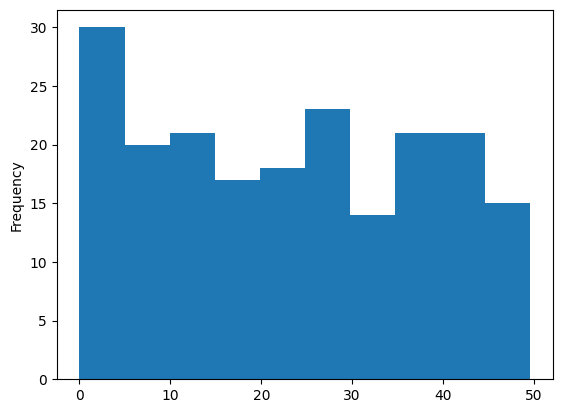

In [38]:
df["Radio"].plot.hist()

### In this above graphs shows that low advertising cost in newspaper 

In [18]:
# fig=px.scatter(df,x="TV",y="Newspaper",color="Sales",
#               size="Radio",hover_data=["Sales"])
# fig.show()

<Figure size 1800x700 with 0 Axes>

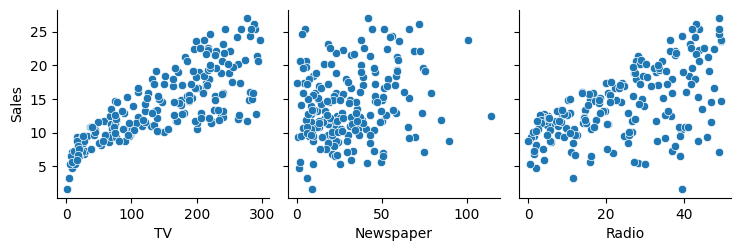

In [26]:
plt.figure(figsize=(18,7))
sns.pairplot(df, x_vars=["TV","Newspaper","Radio"], y_vars="Sales",kind="scatter")
plt.show()

### Cost increasing in TV adds the sales aslo increasing 
### Newspaper and Radio it is bi unpredictable

In [27]:
# fig=px.box(df["TV"])
# fig.show()

In [28]:
# fig=px.box(df["Sales"])
# fig.show()

In [29]:
# fig=px.box(df["Radio"])
# fig.show()

In [30]:
# fig=px.box(df["Newspaper"])
# fig.show()

<AxesSubplot: >

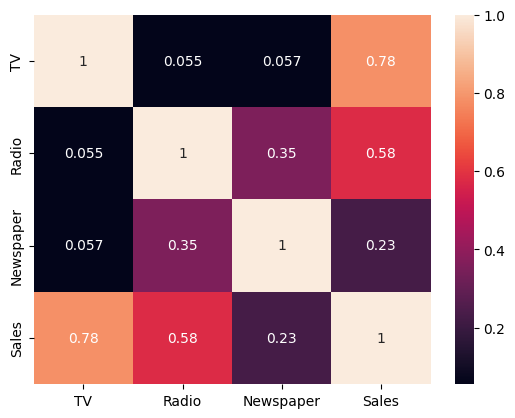

In [23]:
sns.heatmap(df.corr(),annot=True)

## Sales is highly coorealted with TV

### Lets train our model using LinearregRegression

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['TV']],df[['Sales']],test_size=0.3,random_state=0)

In [40]:
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [41]:
print(y_train)

     Sales
131   12.7
96    11.7
181   12.2
19    14.6
153   19.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
res=model.predict(x_test)
print(res)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


In [57]:
re=model.predict(x_train)
print(re)

[[19.46077371]
 [16.36372418]
 [17.32124393]
 [14.05926277]
 [15.15880698]
 [17.28459246]
 [19.34623785]
 [14.80145511]
 [11.91057012]
 [10.80644447]
 [15.78188203]
 [13.46367632]
 [19.85019562]
 [20.89018119]
 [11.71814988]
 [12.34122494]
 [19.01179316]
 [16.6615174 ]
 [18.31083372]
 [16.18504824]
 [16.06593095]
 [11.42035666]
 [ 9.28082688]
 [ 9.06091804]
 [ 7.91097805]
 [18.27418225]
 [ 8.09881685]
 [16.96389206]
 [ 8.48365733]
 [15.41994873]
 [16.78979756]
 [10.33913818]
 [14.16921719]
 [13.23918604]
 [11.6265212 ]
 [19.98763864]
 [19.99680151]
 [ 7.66816203]
 [18.80562862]
 [15.36039009]
 [ 7.84683797]
 [10.769793  ]
 [16.46451573]
 [17.8526903 ]
 [12.23127051]
 [17.65568863]
 [14.79229224]
 [13.31707042]
 [16.78521613]
 [15.41994873]
 [17.24335955]
 [10.37578966]
 [17.71982871]
 [16.16214107]
 [11.77770853]
 [11.23709929]
 [17.77022448]
 [13.7019109 ]
 [ 9.52364289]
 [17.3166625 ]
 [16.26293263]
 [ 7.55820761]
 [18.22378647]
 [17.22503381]
 [17.49991986]
 [ 8.57070458]
 [14.25168

In [63]:
# print("Accuraacy on Train data is: ",r2_score(y_train,re)*100)
# print("Accuraacy on Testing data is: ",r2_score(y_test,res)*100)

In [47]:
m=model.coef_

In [49]:
b=model.intercept_

In [50]:
# line equn y=mx+b
m*69.2+b

array([[10.48116264]])

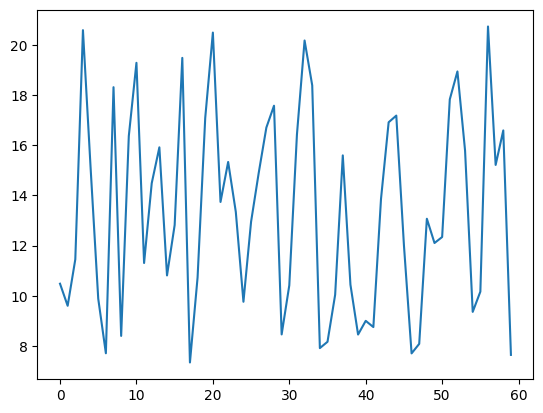

In [51]:
plt.plot(res)

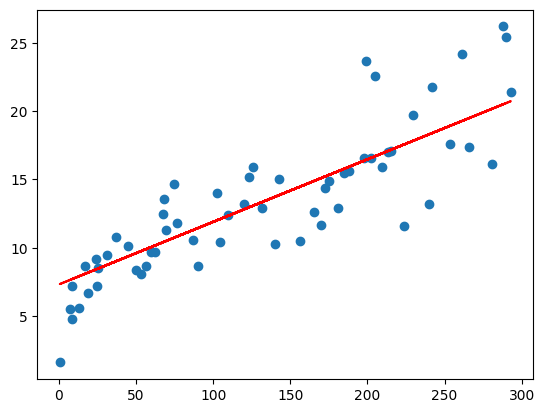

In [55]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color="red")
plt.show()